Previsões (com ARIMA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

Desemprego

 ARIMA(0,1,0)(0,0,0)[0] intercept


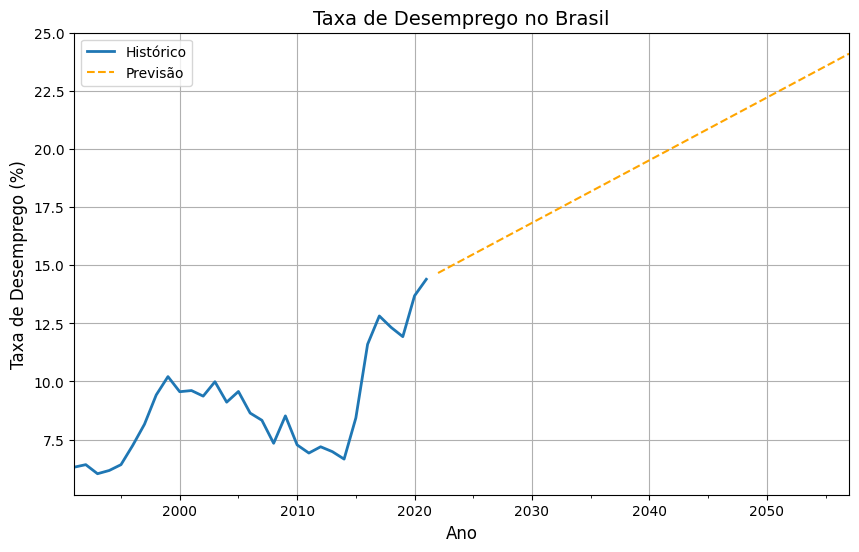

In [3]:
df = pd.read_csv('unemployment analysis.csv')
br = df[df['Country Name']=='Brazil']

br_long = br.melt(
    id_vars=["Country Name", "Country Code"],
    value_vars=[col for col in br.columns if col.isdigit()],
    var_name="year",
    value_name="value"
)

br_long["year"] = br_long["year"].astype(int)
br_long["date"] = pd.to_datetime(br_long["year"], format="%Y")

br_timeseries = br_long[["date", "value"]].sort_values("date").reset_index(drop=True)
br_timeseries.to_csv("brazil_unemployment.csv", index=False)

# índice temporal
df = pd.read_csv('brazil_unemployment.csv', index_col='date', parse_dates=True)

# ARIMA
model = auto_arima(y=df['value'], m=1, seasonal=True)
print(model)

future_index = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1),
                             periods=36, freq="YS")

predictions = pd.Series(model.predict(n_periods=36), index=future_index)

# plotando
plt.figure(figsize=(10,6))
df['value'].plot(label="Histórico", linewidth=2)
predictions.plot(label="Previsão", linestyle="--", color="orange")
plt.title("Taxa de Desemprego no Brasil", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Taxa de Desemprego (%)", fontsize=12)
plt.legend()
plt.grid(True)

plt.show()


Inflação

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=245.209, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=228.706, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=236.889, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=227.324, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=229.308, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=229.315, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=228.549, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=230.927, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=227.333, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.369 seconds
 ARIMA(2,0,0)(0,0,0)[0]          


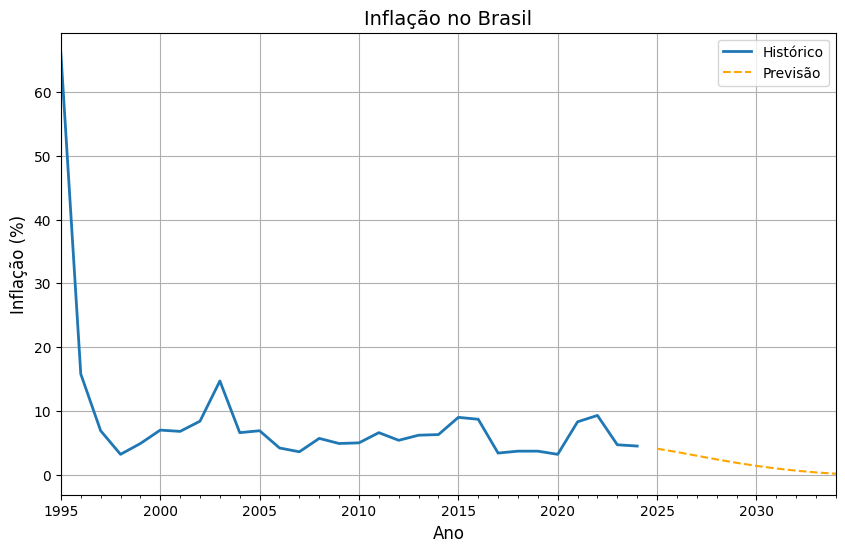

In [4]:
df_infl = pd.read_csv("global_inflation_data.csv")
br_infl = df_infl[df_infl["country_name"] == "Brazil"]

# transformando colunas de anos em formato longo
br_infl_long = br_infl.melt(
    id_vars=["country_name", "indicator_name"],
    value_vars=[col for col in br_infl.columns if col.isdigit()],
    var_name="year",
    value_name="inflation"
)

# ano para datetime
br_infl_long["year"] = br_infl_long["year"].astype(int)
br_infl_long["date"] = pd.to_datetime(br_infl_long["year"], format="%Y")

# criando dataset
br_infl_timeseries = br_infl_long[["date", "inflation"]].sort_values("date").reset_index(drop=True)

# salvando em CSV
br_infl_timeseries.to_csv("brazil_inflation.csv", index=False)
df_infl = pd.read_csv("brazil_inflation.csv", index_col="date", parse_dates=True)

# a partir de 1995
df_infl_recent = df_infl["1995":]

# ARIMA
model_infl = auto_arima(df_infl_recent["inflation"], m=1, seasonal=False, trace=True)
print(model_infl)

future_index = pd.date_range(start=df_infl_recent.index[-1] + pd.DateOffset(years=1),
                             periods=10, freq="YS")

predictions_infl = pd.Series(model_infl.predict(n_periods=10), index=future_index)

# plotando
plt.figure(figsize=(10,6))
df_infl_recent["inflation"].plot(label="Histórico", linewidth=2)
predictions_infl.plot(label="Previsão", linestyle="--", color="orange")

plt.title("Inflação no Brasil", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Inflação (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()